# Massive MIMO ve Small Cell'ler: RL Tabanlı Enerji Verimliliği Projesi

## 📘 Proje Tanımı
Bu notebook, ICT 2013 konferansında yayımlanan "Massive MIMO and Small Cells: Improving Energy Efficiency by Optimal Soft-Cell Coordination" başlıklı makalenin içeriğini anlatır ve MATLAB + CVX kullanılarak elde edilen sonuçları Python'da yeniden üretir. Sonraki aşamada, bu problemi takviyeli öğrenme (reinforcement learning) ile çözmenin potansiyeli incelenecektir.

## 🔎 Makale ve Kodun Bağlantısı
Makaledeki optimizasyon problemi, her kullanıcıya belirli bir QoS sağlanırken toplam (dinamik + statik) güç tüketimini minimize etmeyi amaçlar. Bu optimizasyon problemi, makalenin **Bölüm II-A (Problem Formulation)** ve **Bölüm III (Algorithms for Non-Coherent Coordination)** kısımlarında açıklanır. 

Notebook’ta yer alan kod parçaları:
- Figure 3: **Şekil 3**, farklı SCA anten konfigürasyonları altında BS anten sayısına göre toplam güç tüketimini gösterir. Makalenin **Bölüm IV ve Şekil 3** kısmına karşılık gelir.
- Figure 4: **Şekil 4**, QoS hedefleri değiştikçe üç farklı beamforming algoritmasının güç tüketimlerini karşılaştırır. Bu, makaledeki **Bölüm IV ve Şekil 4** kısmına karşılık gelir.

## 📦 Kullanılan Python Kütüphaneleri

In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import cvxpy as cp

## 📂 MATLAB Sonuçlarının Yüklenmesi
MATLAB tarafında daha önce çalıştırılıp kaydedilen `.mat` dosyaları yüklenir.

In [ ]:
data_fig3 = scipy.io.loadmat("/Users/hasantan/Library/CloudStorage/GoogleDrive-tann.hasan.tann@gmail.com/Drive'ım/Yüksek Lisans/TezCalisma/bjornson_rl/massive-MIMO-small-cells-master/figure3.mat")
data_fig4 = scipy.io.loadmat("/Users/hasantan/Library/CloudStorage/GoogleDrive-tann.hasan.tann@gmail.com/Drive'ım/Yüksek Lisans/TezCalisma/bjornson_rl/massive-MIMO-small-cells-master/figure4.mat")

## 📊 Şekil 3'ün Yeniden Oluşturulması
Makalenin Şekil 3'ünde, farklı SCA anten senaryoları (0, 1, 2, 3 anten) için BS anten sayısına karşılık gelen toplam güç tüketimi gösterilir.


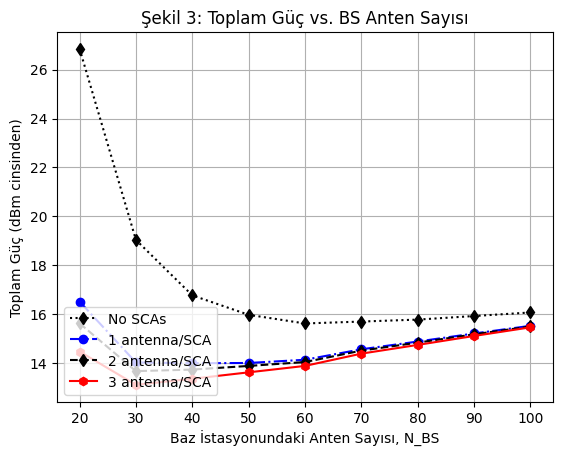

In [4]:
NBScases = np.arange(20, 101, 10)
totalpower_average_fig3 = data_fig3["totalpower_average"]

plt.figure()
plt.plot(NBScases, 10 * np.log10(totalpower_average_fig3[:, 0]), 'kd:', label='No SCAs')
plt.plot(NBScases, 10 * np.log10(totalpower_average_fig3[:, 1]), 'bo-.', label='1 antenna/SCA')
plt.plot(NBScases, 10 * np.log10(totalpower_average_fig3[:, 2]), 'kd--', label='2 antenna/SCA')
plt.plot(NBScases, 10 * np.log10(totalpower_average_fig3[:, 3]), 'rh-', label='3 antenna/SCA')
plt.xlabel("Baz İstasyonundaki Anten Sayısı, N_BS")
plt.ylabel("Toplam Güç (dBm cinsinden)")
plt.legend(loc="lower left")
plt.grid(True)
plt.title("Şekil 3: Toplam Güç vs. BS Anten Sayısı")
plt.show()

## 📊 Şekil 4'ün Yeniden Oluşturulması
Makaledeki Şekil 4, kullanıcı başına QoS değeri değiştikçe 3 farklı beamforming algoritmasının enerji tüketimini karşılaştırır:
- Sadece BS ile servis
- Multiflow-RZF (düşük karmaşıklıklı)
- Optimal Spatial Soft-Cell koordinasyon

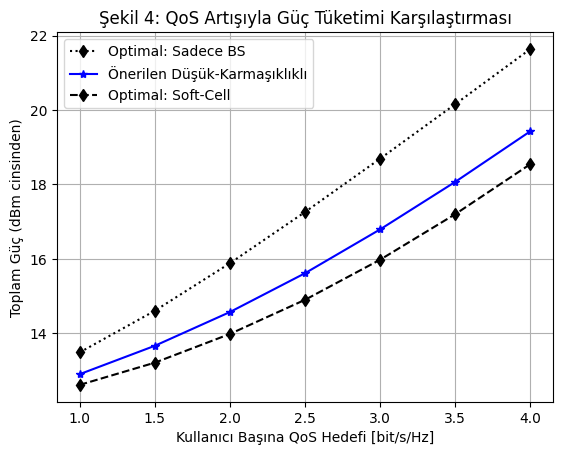

In [5]:
QoSvalues = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4])
totalpower_average_fig4 = data_fig4["totalpower_average"]

plt.figure()
plt.plot(QoSvalues, 10 * np.log10(totalpower_average_fig4[:, 2]), 'kd:', label='Optimal: Sadece BS')
plt.plot(QoSvalues, 10 * np.log10(totalpower_average_fig4[:, 1]), 'b*-', label='Önerilen Düşük-Karmaşıklıklı')
plt.plot(QoSvalues, 10 * np.log10(totalpower_average_fig4[:, 0]), 'kd--', label='Optimal: Soft-Cell')
plt.xlabel("Kullanıcı Başına QoS Hedefi [bit/s/Hz]")
plt.ylabel("Toplam Güç (dBm cinsinden)")
plt.legend(loc="upper left")
plt.grid(True)
plt.title("Şekil 4: QoS Artışıyla Güç Tüketimi Karşılaştırması")
plt.show()

## 🔄 Sonraki Adım
Bir sonraki adımda, makaledeki CVX tabanlı optimizasyon fonksiyonlarını (`function_QoSproblem_singleBS`, `function_QoSproblem_relaxation`) Python-CVXPY ile yeniden yazacağız ve doğrudan çözümleri elde etmeye çalışacağız. Eğer bu mümkün değilse, `.mat` dosyaları üzerinden çalışmaya devam edilecektir.

## 🚀 Takviyeli Öğrenme ile Geliştirme
RL ile aşağıdaki noktalar hedeflenmektedir:
- Kullanıcı-verici atamasını RL ile öğrenmek
- Enerji verimliliğini artıracak aksiyonları çevrim içi olarak optimize etmek
- Eğer zaman kalırsa: RL ajanı eğitilip sonuçlar karşılaştırılır
- Zaman kalmazsa: RL’in bu bağlamdaki avantajları teorik olarak açıklanır
